In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
import sys

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_dir = r"/content/drive/My Drive/clean-dataset/train" #r for raw string
validation_dir = r"/content/drive/My Drive/clean-dataset/validation"

In [0]:
# train_dir = r"C:/Users/Hasan/Desktop/code/tutorial_deeplearning/clean-dataset/train" #r for raw string
# validation_dir = r"C:/Users/Hasan/Desktop/code/tutorial_deeplearning/clean-dataset/validation"

train_num = 0 # count no. of training data
for r, d, files in os.walk(train_dir):
    train_num +=len(files)
    
validation_num = 0 # count no. of testing data
for r, d, files in os.walk(validation_dir):
    validation_num +=len(files)

In [6]:
# use ImageDataGenerator class to load images and
# flow_from_directory function to generate batches of images and labels

datagen = ImageDataGenerator(rescale = 1./255)
batchSize = 32 # 32 is a good starting point
inputSize = 30

train_generator = datagen.flow_from_directory(
    train_dir, 
    target_size = (inputSize,inputSize),  
    batch_size = batchSize,
    class_mode = 'categorical', 
    shuffle = True)

validation_generator = datagen.flow_from_directory(
    validation_dir, 
    target_size = (inputSize,inputSize), 
    batch_size = batchSize,
    class_mode = 'categorical', 
    shuffle = False)

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [0]:
import sys
sys.path.append('/content/drive/My Drive/clean-dataset')

In [8]:
from smallconvnet import SmallCONVNet

model = SmallCONVNet.build(width=inputSize, height=inputSize, depth=3,
                           classes=3)








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
from keras import optimizers

# Compile the network
print("[INFO] training network...")
opt = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)


[INFO] training network...

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
19/18 [==============================] - 262s 14s/step - loss: 1.8607 - acc: 0.3635 - val_loss: 1.0917 - val_acc: 0.4533
Epoch 2/20
19/18 [==============================] - 2s 85ms/step - loss: 1.5564 - acc: 0.4540 - val_loss: 0.9406 - val_acc: 0.5600
Epoch 3/20
19/18 [==============================] - 2s 95ms/step - loss: 1.4375 - acc: 0.5032 - val_loss: 0.9025 - val_acc: 0.6000
Epoch 4/20
19/18 [==============================] - 2s 97ms/step - loss: 1.2707 - acc: 0.5352 - val_loss: 0.8151 - val_acc: 0.6400
Epoch 5/20
19/18 [==============================] - 2s 99ms/step - loss: 1.2755 - acc: 0.5549 - val_loss: 0.8742 - val_acc: 0.6533
Epoch 6/20
19/18 [==============================] - 2s 98ms/step - loss: 1.3243 - acc: 0.5719 - val_loss: 0.8103 - val_acc: 0.6867
Epoch 7/20
19/18 [==============================] - 2s 95ms/step - loss: 1.0581 - acc: 0.62

In [10]:
# predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
# predicted_classes = np.argmax(predictions,axis=1)

test_loss,test_acc = model.evaluate_generator(validation_generator, 
                                              steps=validation_generator.samples/validation_generator.batch_size)

print('\ntesting loss: {}, testing acc: {}\n'.format(test_loss, test_acc))


testing loss: 0.5920349506537119, testing acc: 0.7733333309491476



Text(0.5, 1.0, 'Accuracy Curves')

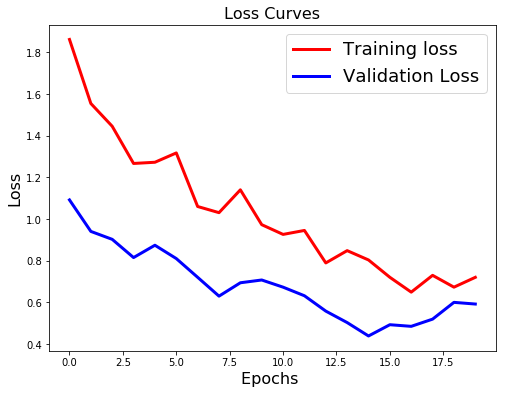

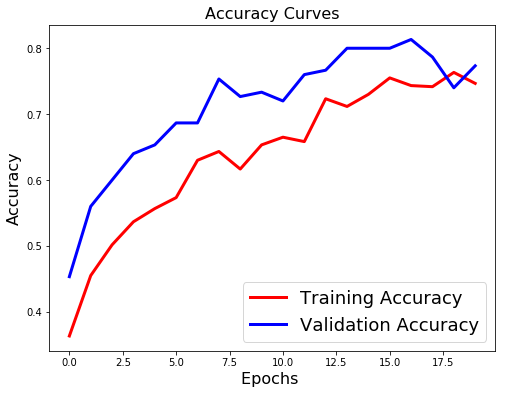

In [11]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

5/4 [================================] - 0s 71ms/step
Classification Report
              precision    recall  f1-score   support

     pumpkin       0.93      0.74      0.82        50
  watermelon       0.70      0.64      0.67        50
      tomato       0.73      0.94      0.82        50

    accuracy                           0.77       150
   macro avg       0.79      0.77      0.77       150
weighted avg       0.79      0.77      0.77       150

Normalized confusion matrix
[[0.74 0.22 0.04]
 [0.06 0.64 0.3 ]
 [0.   0.06 0.94]]


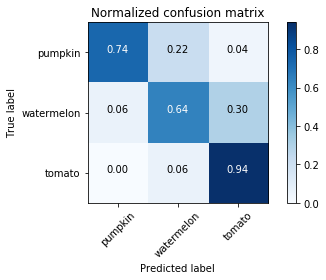

In [15]:
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

# Get the ground truth from generator
ground_truth = validation_generator.classes

#Confusion Matrix and Classification Report
conf_mat = confusion_matrix(ground_truth, predicted_classes)
print('Classification Report')
target_names = ['pumpkin', 'watermelon', 'tomato']
print(classification_report(validation_generator.classes, predicted_classes, target_names=target_names))
plt.figure()
plot_confusion_matrix(conf_mat, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [0]:
model.save('fullyConnected_owndata.h5')
new_model = tf.keras.models.load_model('fullyConnected_owndata.h5')